In [83]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn import metrics
# Setting random seed to get reproducible runs
RSEED = 100

# Part 1: Data Processing

In [64]:
data = pd.read_csv("factorsCancerPerCounty.csv")

C:\Users\Owner\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [66]:
data.columns

Index(['locale', 'fips', 'annual_count_avg', 'areatype', 'cancer', 'stateFIPS',
       'state', 'cancer_description', 'ACID', 'ENRG', 'ETOX', 'EUTR', 'FOOD',
       'GCC', 'HAPS', 'HAZW', 'HC', 'HNC', 'HRSP', 'HTOX', 'JOBS', 'LAND',
       'METL', 'MINE', 'MSW', 'NREN', 'OZON', 'PEST', 'REN', 'SMOG', 'VADD',
       'WATR'],
      dtype='object')

In [67]:
data

,locale,fips,annual_count_avg,areatype,cancer,stateFIPS,state,cancer_description,ACID,ENRG,...,METL,MINE,MSW,NREN,OZON,PEST,REN,SMOG,VADD,WATR
0,"Autauga County(6,10)",1001,304,county,1,1,alabama,All Cancer Sites,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
1,"Autauga County(6,10)",1001,8,county,3,1,alabama,Oral Cavity & Pharynx,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
2,"Autauga County(6,10)",1001,3,county,17,1,alabama,Esophagus,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
3,"Autauga County(6,10)",1001,6,county,18,1,alabama,Stomach,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
4,"Autauga County(6,10)",1001,32,county,20,1,alabama,Colon & Rectum,299.152569,728644.544118,...,0.050200,0.000000,2149.369209,435169.166702,0.002923,0.034974,293475.377416,2949.632736,79914.159702,7851.498268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72054,"Weston County(6,10)",56045,3,county,86,56,wyoming,Non-Hodgkin Lymphoma,34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72055,"Weston County(6,10)",56045,3,county,90,56,wyoming,Leukemia,34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72056,"Weston County(6,10)",56045,3,county,400,56,wyoming,Breast (in situ) (Female),34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143
72057,"Weston County(6,10)",56045,3,county,515,56,wyoming,"Childhood (Ages <20, All Sites)",34.618906,428737.854052,...,0.000817,17113.628433,348.003649,428660.792817,0.000395,0.000943,77.061234,1321.995548,12995.136488,47.904143


In [69]:
print(data.dtypes)
data['annual_count_avg'].replace({r'[^\x00-\x7F]+':'0'}, regex=True, inplace=True)
data['annual_count_avg'] = data['annual_count_avg'].astype("float64")

locale                 object
fips                    int64
annual_count_avg       object
areatype               object
cancer                  int64
stateFIPS               int64
state                  object
cancer_description     object
ACID                  float64
ENRG                  float64
ETOX                  float64
EUTR                  float64
FOOD                  float64
GCC                   float64
HAPS                  float64
HAZW                  float64
HC                    float64
HNC                   float64
HRSP                  float64
HTOX                  float64
JOBS                  float64
LAND                  float64
METL                  float64
MINE                  float64
MSW                   float64
NREN                  float64
OZON                  float64
PEST                  float64
REN                   float64
SMOG                  float64
VADD                  float64
WATR                  float64
dtype: object


In [70]:
cancerVals=data["cancer"].unique()
cancerVals

array([  1,   3,  17,  18,  20,  35,  40,  47,  53,  55,  57,  58,  61,
        66,  71,  72,  76,  80,  86,  90, 400, 515, 516], dtype=int64)

In [71]:
cancerDescr=data["cancer_description"].unique()
cancerDescr

array(['All Cancer Sites', 'Oral Cavity & Pharynx', 'Esophagus',
       'Stomach', 'Colon & Rectum', 'Liver & Bile Duct', 'Pancreas',
       'Lung & Bronchus', 'Melanoma of the Skin', 'Breast (Female)',
       'Cervix (Female)', 'Uterus (Corpus & Uterus, NOS) (Female)',
       'Ovary (Female)', 'Prostate (Male)', 'Bladder',
       'Kidney & Renal Pelvis', 'Brain & ONS', 'Thyroid',
       'Non-Hodgkin Lymphoma', 'Leukemia', 'Breast (in situ) (Female)',
       'Childhood (Ages <20, All Sites)',
       'Childhood (Ages <15, All Sites)'], dtype=object)

In [72]:
cancerDescription=data[["cancer","cancer_description"]]
cancerTypes=cancerDescription.groupby(["cancer","cancer_description"]).sum().reset_index()
print(cancerTypes)
cancer=cancerTypes["cancer"]==1
print("example:")
print(cancerTypes[cancer]["cancer_description"][0])

    cancer                      cancer_description
0        1                        All Cancer Sites
1        3                   Oral Cavity & Pharynx
2       17                               Esophagus
3       18                                 Stomach
4       20                          Colon & Rectum
5       35                       Liver & Bile Duct
6       40                                Pancreas
7       47                         Lung & Bronchus
8       53                    Melanoma of the Skin
9       55                         Breast (Female)
10      57                         Cervix (Female)
11      58  Uterus (Corpus & Uterus, NOS) (Female)
12      61                          Ovary (Female)
13      66                         Prostate (Male)
14      71                                 Bladder
15      72                   Kidney & Renal Pelvis
16      76                             Brain & ONS
17      80                                 Thyroid
18      86                    N

# Part 2: Hypertuning

In [ ]:
cancerData=data["cancer"]==1
newData=data[cancerData]    

#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

In [82]:
# Create the model with 10 trees
#regressor = RandomForestRegressor(n_estimators = 100,
                                 # random_state = RSEED)

# Fit on training data
#regressor.fit(X_train, y_train)

parameters={'n_estimators':[4, 16,32,50,64,100,128, 256],'max_depth': [2, 8, 16,32,50,64]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [81]:
print(clf.best_params_)

{'max_depth': 64, 'n_estimators': 32}


# Random Forest Regressor for environmental factors in a county and cancer rates

In [ ]:
for i in cancerVals:
    #print cancer type number
    print("cancer type:",i)
    
    #print cancer description
    cancer=cancerTypes["cancer"]==i
    print(cancerTypes[cancer]["cancer_description"][0])
    print("\n")
    #selecting data for the specific cancer type
    cancerData=data["cancer"]==i
    newData=data[cancerData]
    
    #splitting to test and train
    x1=newData.loc[:, 'ACID':'WATR']
    y = newData['annual_count_avg']

    X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                        test_size=0.3,
                                                        random_state = RSEED)

    scaler = StandardScaler()
    scaler.fit(X_train1)

    X_train = scaler.transform(X_train1)
    X_test = scaler.transform(X_test1)
    
    #Creating RandomForest Model
    print("Creating RandomForest Model and Fitting the Data")
    rf = RandomForestRegressor(n_estimators = 32,
                                      max_depth: 64, 
                                      random_state = RSEED)

    # Fit on training data
    rf.fit(X_train, y_train)
    
    #Evaluation
    pred=rf.predict(X_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy Score",acc_score)
    r2_score=rf.score(X_test, y_test)
    print("score",score)

### Splitting to test and train

In [73]:
cancerData=data["cancer"]==1
newData=data[cancerData]
print(newData)    
#splitting to test and train
x1=newData.loc[:, 'ACID':'WATR']
y = newData['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)



                        locale   fips  annual_count_avg areatype  cancer  \
0         Autauga County(6,10)   1001             304.0   county       1   
23        Baldwin County(6,10)   1003            1189.0   county       1   
46        Barbour County(6,10)   1005             145.0   county       1   
69           Bibb County(6,10)   1007             128.0   county       1   
92         Blount County(6,10)   1009             317.0   county       1   
...                        ...    ...               ...      ...     ...   
71944  Sweetwater County(6,10)  56037             162.0   county       1   
71967       Teton County(6,10)  56039              98.0   county       1   
71990       Uinta County(6,10)  56041              78.0   county       1   
72013    Washakie County(6,10)  56043              44.0   county       1   
72036      Weston County(6,10)  56045              40.0   county       1   

       stateFIPS    state cancer_description        ACID          ENRG  ...  \
0       

### Creating Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 10 trees
regressor = RandomForestRegressor(n_estimators = 100,
                                  random_state = RSEED)

# Fit on training data
regressor.fit(X_train, y_train)

### Evaluation

In [6]:
from sklearn import metrics
train_rf_predictions = regressor.predict(X_train)
rf_predictions = regressor.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",regressor.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: 0.9603257019945082


Evaluation for test:

Accuracy Test -inf%
r2_score Test: 0.8700949707169692
score 0.8700949707169692


Text(0, 0.5, 'Feature')

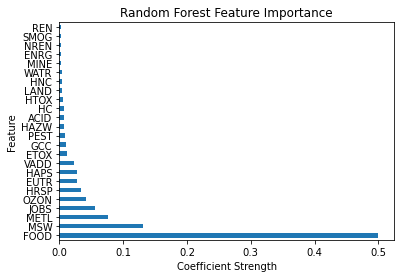

In [7]:
ind = np.argsort(regressor.feature_importances_)[::-1]
imp = regressor.feature_importances_[ind][:24]
cols =x1.columns[ind][:24]
pl = pd.Series(imp, index=cols).plot(kind='barh', title='Random Forest Feature Importance')
pl.set_xlabel("Coefficient Strength")
pl.set_ylabel("Feature")

# Random Forest Regressor for HTOX,HC

### Splitting to test and train

In [8]:
from sklearn.model_selection import train_test_split
x1=data[['HTOX','HC']]

y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)


XTrain (2193, 2)
XTest (940, 2)


### Creating Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 10 trees
regressor2 = RandomForestRegressor(n_estimators = 100,
                                  random_state = RSEED)

# Fit on training data
regressor2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

### Evaluation

In [10]:
from sklearn import metrics
train_rf_predictions = regressor2.predict(X_train)
rf_predictions = regressor2.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",regressor2.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: 0.9406317407812158


Evaluation for test:

Accuracy Test -inf%
r2_score Test: 0.41378470045227933
score 0.41378470045227933


Text(0, 0.5, 'Feature')

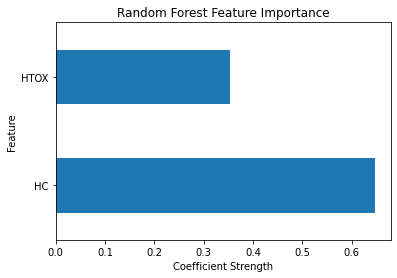

In [11]:
ind = np.argsort(regressor2.feature_importances_)[::-1]
imp = regressor2.feature_importances_[ind][:2]
cols =x1.columns[ind][:2]
#print(imp)
pl = pd.Series(imp, index=cols).plot(kind='barh', title='Random Forest Feature Importance')
pl.set_xlabel("Coefficient Strength")
pl.set_ylabel("Feature")

# Logistic Regression for environmental factors in a county and cancer rates

### Splitting test and train

In [12]:
from sklearn.model_selection import train_test_split
x1=data.loc[:, :'WATR']
y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)



XTrain (2193, 24)
XTest (940, 24)


### Creating LR model

In [13]:
from sklearn.linear_model import LogisticRegression
# Create the model 
lr = LogisticRegression()

# Fit on training data
lr.fit(X_train, y_train)

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation

In [14]:
from sklearn import metrics
train_rf_predictions = lr.predict(X_train)
rf_predictions = lr.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",lr.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: 0.8585743357921237


Evaluation for test:

Accuracy Test -inf%
r2_score Test: 0.4621527729275319
score 0.06170212765957447


In [15]:
#ind = np.argsort(np.abs(lr.coef_))[::-1][:24]
#cols =x1.columns[ind]
#vals = np.sort(np.abs(lr.coef_))[::-1][:24]
#print(cols,vals)
#pt = pd.Series(vals, index=cols).plot('barh', title = 'Important variables in Linear Regression')
#pl.set_xlabel("Coefficient Strength")
#pl.set_ylabel("Feature")

# Logistic Regression for HTOX,HC

### Splitting test and train

In [16]:
from sklearn.model_selection import train_test_split
x1=data[['HTOX','HC']]

y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)


XTrain (2193, 2)
XTest (940, 2)


### Creating LR model

In [17]:
from sklearn.linear_model import LogisticRegression
# Create the model 
lr = LogisticRegression()

# Fit on training data
lr.fit(X_train, y_train)

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation

In [18]:
from sklearn import metrics
train_rf_predictions = lr.predict(X_train)
rf_predictions = lr.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",lr.score(X_test, y_test))

Evaluation for train:

Accuracy Train 0.3190437064941989%
r2_score Train: 0.4714775218611794


Evaluation for test:

Accuracy Test -0.16613741029571827%
r2_score Test: 0.11461408330990763


# SVR for environmental factors in a county and cancer rates

### Splitting test and train

In [25]:
from sklearn.model_selection import train_test_split
x1=data.loc[:, :'WATR']
y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)



XTrain (2193, 24)
XTest (940, 24)


### Creating SVR model

In [26]:
from sklearn.svm import LinearSVR
# Create the model 

svr = LinearSVR(random_state=0, tol=1e-5)
# Fit on training data
svr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=1e-05, verbose=0)

### Evaluation

In [27]:
from sklearn import metrics
train_rf_predictions = svr.predict(X_train)
rf_predictions = svr.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",svr.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: 0.32574365212920087


Evaluation for test:

Accuracy Test -inf%
r2_score Test: 0.1925047582004683
score 0.1925047582004683


# SVR for HTOX,HC

### splitting for test and train

In [28]:
from sklearn.model_selection import train_test_split
x1=data[['HTOX','HC']]

y = data['annual_count_avg']

X_train1, X_test1, y_train, y_test = train_test_split(x1, y,
                                                    test_size=0.3,
                                                    random_state = RSEED)

scaler = StandardScaler()
scaler.fit(X_train1)

X_train = scaler.transform(X_train1)
X_test = scaler.transform(X_test1)

print("XTrain",X_train.shape)
print("XTest",X_test.shape)


XTrain (2193, 2)
XTest (940, 2)


### Creating SVR model

In [29]:
from sklearn.svm import LinearSVR
# Create the model 

svr = LinearSVR(random_state=0, tol=1e-5)
# Fit on training data
svr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=1e-05, verbose=0)

### Evaluation

In [30]:
from sklearn import metrics
train_rf_predictions = svr.predict(X_train)
rf_predictions = svr.predict(X_test)
MAE_train = metrics.mean_absolute_error(y_train, train_rf_predictions)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_rf_predictions))
MAPE_train = 100 * np.mean(abs(train_rf_predictions - y_train)/abs(y_train))
accuracy_train = 100 - MAPE_train
r2_train = metrics.r2_score(y_train, train_rf_predictions)

MAE_test = metrics.mean_absolute_error(y_test, rf_predictions)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
MAPE_test = 100 * np.mean(abs(rf_predictions - y_test)/abs(y_test))
accuracy_test = 100 - MAPE_test
r2_test = metrics.r2_score(y_test, rf_predictions)
print("Evaluation for train:")
print()
#print('Mean Absolute Error Train:', MAE_train)    
#print('Root Mean Squared Error Train:', RMSE_train)
#print('Mean Absolute Percentage Error Train:', MAPE_train)
print('Accuracy Train', str(accuracy_train) + "%")
print('r2_score Train:',r2_train)
print()
print()
print("Evaluation for test:")
print()
#print('Mean Absolute Error Test:', MAE_test)    
#print('Root Mean Squared Error Test:', RMSE_test)
#print('Mean Absolute Percentage Error Test:', MAPE_test)
print('Accuracy Test', str(accuracy_test) + "%")
print('r2_score Test:', r2_test)
print("score",svr.score(X_test, y_test))

Evaluation for train:

Accuracy Train -inf%
r2_score Train: -0.0294099288709071


Evaluation for test:

Accuracy Test -inf%
r2_score Test: -0.08589664158110089
score -0.08589664158110089
